In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle

In [3]:
aisles = pd.read_csv("Data/aisles.csv")
departments = pd.read_csv("Data/departments.csv")
order_products_prior = pd.read_csv("Data/order_products__prior.csv")
order_products_train = pd.read_csv("Data/order_products__train.csv")
orders = pd.read_csv("Data/orders.csv")
products = pd.read_csv("Data/products.csv")

In [4]:
df = pd.DataFrame(orders)


In [4]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [33]:
count_orders = df.groupby('user_id')['user_id'].count()
count_orders =  count_orders.sort_values()

In [49]:
user_ids = df.groupby('user_id').count().reset_index()

In [56]:
order_df = pd.DataFrame(orders)

In [59]:
order_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [66]:
user_1000 = order_df[order_df['user_id'] < 1001]

In [69]:
user_1000 = user_1000[user_1000.eval_set != 'test']

In [71]:
user_1000[user_1000.eval_set == 'test']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [72]:
user_1000

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
16140,2003258,1000,prior,4,0,17,5.0
16141,568709,1000,prior,5,6,18,30.0
16142,18216,1000,prior,6,6,16,7.0
16143,2885089,1000,prior,7,0,18,8.0


In [75]:
len(order_products_train) + len(order_products_prior)

33819106

In [77]:
merged_order_products = pd.merge(order_products_train, order_products_prior, how = 'outer')

In [79]:
merge_order = pd.merge(user_1000, merged_order_products, on='order_id', how='left')

In [85]:
merge_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
156794,903956,1000,train,8,0,13,21.0,27336,12,1
156795,903956,1000,train,8,0,13,21.0,47439,13,1
156796,903956,1000,train,8,0,13,21.0,30391,14,0
156797,903956,1000,train,8,0,13,21.0,42609,15,1


In [96]:
products_name = pd.DataFrame(products)
products_name = products_name['product_name'].tolist()
products_name[0]

'Chocolate Sandwich Cookies'

In [104]:
products['price'] = price

In [105]:
products

,product_id,product_name,aisle_id,department_id,price
0,1,Chocolate Sandwich Cookies,61,19,113
1,2,All-Seasons Salt,104,13,86
2,3,Robust Golden Unsweetened Oolong Tea,94,7,178
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,155
4,5,Green Chile Anytime Sauce,5,13,104
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,64
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,191
49685,49686,Artisan Baguette,112,3,154
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,65


In [155]:
product_order_count = merge_order.groupby('product_id')['product_id'].count().sort_values(ascending=False)
product_count_max = product_order_count.to_dict()
type(product_count_max)
product_count_max = list(product_count_max.keys())
product_count_max = product_count_max[:20]
product_count_max
# products.shape

[24852,
 13176,
 21137,
 21903,
 47209,
 47766,
 47626,
 26209,
 27966,
 16797,
 27845,
 24964,
 45007,
 22935,
 49683,
 39275,
 30391,
 5876,
 27086,
 4920]

In [162]:
new_orders = merge_order[merge_order.product_id.isin(product_count_max)]

In [163]:
new_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
8,2398795,1,prior,2,3,7,15.0,13176,4,0
28,431534,1,prior,5,4,15,28.0,13176,8,1
67,1187899,1,train,11,4,8,14.0,27845,9,0
71,2168274,2,prior,1,2,11,NaN,47766,2,0
80,2168274,2,prior,1,2,11,NaN,27966,11,0
...,...,...,...,...,...,...,...,...,...,...
156735,2003258,1000,prior,4,0,17,5.0,49683,10,1
156745,568709,1000,prior,5,6,18,30.0,49683,6,1
156758,18216,1000,prior,6,6,16,7.0,49683,6,1
156772,2885089,1000,prior,7,0,18,8.0,49683,5,1


In [164]:
products[products.product_id.isin(product_count_max)]

,product_id,product_name,aisle_id,department_id,price
4919,4920,Seedless Red Grapes,123,4,162
5875,5876,Organic Lemon,24,4,43
13175,13176,Bag of Organic Bananas,24,4,177
16796,16797,Strawberries,24,4,95
21136,21137,Organic Strawberries,24,4,109
21902,21903,Organic Baby Spinach,123,4,200
22934,22935,Organic Yellow Onion,83,4,130
24851,24852,Banana,24,4,109
24963,24964,Organic Garlic,83,4,163
26208,26209,Limes,24,4,78


In [174]:
ls = []
for i in range(1, 49689):
    ls.append(i)

In [175]:
products['department_id'] = ls

In [176]:
products

,product_id,product_name,aisle_id,department_id,price
0,1,Chocolate Sandwich Cookies,61,1,113
1,2,All-Seasons Salt,104,2,86
2,3,Robust Golden Unsweetened Oolong Tea,94,3,178
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,4,155
4,5,Green Chile Anytime Sauce,5,5,104
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,49684,64
49684,49685,En Croute Roast Hazelnut Cranberry,42,49685,191
49685,49686,Artisan Baguette,112,49686,154
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,49687,65


In [182]:
import requests
query = {'key':'26535621-5bcab1d2a90409bb16ba7fbf4', 'q':'Hazelnut Cranberry'}
response = requests.get('https://pixabay.com/api', params=query)
data = response.json()

In [204]:
products_names = products['product_name'].to_list()

In [223]:
part_product = products_names[:10]

In [240]:
urls = []
st = "https://pixabay.com/get/g6e24d250275f1ca1728f188f5fe8d60eb0331765abe9235a87d9acb49bca3ee3a15545ce544be175acbc9872f411fa8ccbe28c1e893487c3a5d18c8958e4654c_640.jpg"
for name in part_product:
        query = {'key':'26535621-5bcab1d2a90409bb16ba7fbf4'}
        query['q'] = 'grocery'
        response = requests.get('https://pixabay.com/api', params=query)
        data = response.json()
        if data['total'] > 0:
            print(data['total'], data['hits'][0]['webformatURL'])
            ok = False
            print()
            urls.append(data['hits'][0]['webformatURL'])
        else:
            urls.append(st)
        del data

        # print(data['hits'][0]['webformatURL'])

655 https://pixabay.com/get/g43f49b224e03349a3cb8c6f29e74a8d881b24f4446ad27e2aabe7dbb8cdb3289b85cc98c1b1c43b66713e33e26eab0811d2acd40a4ccfb445f8fe3154986a256_640.jpg

655 https://pixabay.com/get/g688b0f503272858afd6268628100705c05696ee09a26bad652282370338bdd6685b6a3e1e0ac3e275ff8b314d62ce5744cd1da27f50ae37fb2836a567e36b0cc_640.jpg

655 https://pixabay.com/get/gd233ebd29c7624ce302059ede7916b289d6c0d72b16f4a33ff42e2a9777c928750c7cf254b8e5ffa5972173b5e0d841d1e424e7814ae4686b75efa7f6082730b_640.jpg

655 https://pixabay.com/get/gbaa295b3dadb4878d917e97268c6b8342a5532f3fb979e8211020b4a180797dac4c5afd876ca91eb52614087a4ce368baaa43411b4d0cb5b42100a772e73f7a7_640.jpg

655 https://pixabay.com/get/gdfbb4e9aea8a1a5b0cb92d6ef487456093325e15c207c8ea1af2e70f2c868c2b7e7f4b4775d09de035896e126b0a2963c34e8bafdaa6c2146e9d5abff5d562f1_640.jpg

655 https://pixabay.com/get/ge28f4fc18fad8ddd3bd602ea147fe1f37ca27aa09fee17924a1be3bce7588d25711bff6c7d796aa844d4540ab3666756240ea4a54935f35a301f37e8cb2aec1a_640.jpg

In [238]:
urls

['https://pixabay.com/get/g46dd27c41f115c71166e6918d105303d841ffc5e620c2137302116781234f7f3856464e219354101b564727ad90a3246bb56bd50654b8efcc2da9d2b2cfbc094_640.jpg',
 'https://pixabay.com/get/g6e24d250275f1ca1728f188f5fe8d60eb0331765abe9235a87d9acb49bca3ee3a15545ce544be175acbc9872f411fa8ccbe28c1e893487c3a5d18c8958e4654c_640.jpg',
 'https://pixabay.com/get/g6e24d250275f1ca1728f188f5fe8d60eb0331765abe9235a87d9acb49bca3ee3a15545ce544be175acbc9872f411fa8ccbe28c1e893487c3a5d18c8958e4654c_640.jpg',
 'https://pixabay.com/get/g6e24d250275f1ca1728f188f5fe8d60eb0331765abe9235a87d9acb49bca3ee3a15545ce544be175acbc9872f411fa8ccbe28c1e893487c3a5d18c8958e4654c_640.jpg',
 'https://pixabay.com/get/g6e24d250275f1ca1728f188f5fe8d60eb0331765abe9235a87d9acb49bca3ee3a15545ce544be175acbc9872f411fa8ccbe28c1e893487c3a5d18c8958e4654c_640.jpg',
 'https://pixabay.com/get/g6e24d250275f1ca1728f188f5fe8d60eb0331765abe9235a87d9acb49bca3ee3a15545ce544be175acbc9872f411fa8ccbe28c1e893487c3a5d18c8958e4654c_640.jpg',
 'ht

In [207]:
len(urls)

49688

In [208]:
products['image'] = urls

In [209]:
products

,product_id,product_name,aisle_id,department_id,price,image
0,1,Chocolate Sandwich Cookies,61,1,113,https://pixabay.com/get/g43000bc6ca1a193335f6f...
1,2,All-Seasons Salt,104,2,86,https://pixabay.com/get/g43000bc6ca1a193335f6f...
2,3,Robust Golden Unsweetened Oolong Tea,94,3,178,https://pixabay.com/get/g43000bc6ca1a193335f6f...
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,4,155,https://pixabay.com/get/g43000bc6ca1a193335f6f...
4,5,Green Chile Anytime Sauce,5,5,104,https://pixabay.com/get/g43000bc6ca1a193335f6f...
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,49684,64,https://pixabay.com/get/g43000bc6ca1a193335f6f...
49684,49685,En Croute Roast Hazelnut Cranberry,42,49685,191,https://pixabay.com/get/g43000bc6ca1a193335f6f...
49685,49686,Artisan Baguette,112,49686,154,https://pixabay.com/get/g43000bc6ca1a193335f6f...
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,49687,65,https://pixabay.com/get/g43000bc6ca1a193335f6f...


In [216]:
urls

['https://pixabay.com/get/g43000bc6ca1a193335f6f5ae4eb37aa832abb4029c8a5ddffa0ec53189ecbdbddf634f43c8f62e521497818ee5bae61e8ca4893d123a441b9d384c780603c089_640.jpg',
 'https://pixabay.com/get/g43000bc6ca1a193335f6f5ae4eb37aa832abb4029c8a5ddffa0ec53189ecbdbddf634f43c8f62e521497818ee5bae61e8ca4893d123a441b9d384c780603c089_640.jpg',
 'https://pixabay.com/get/g43000bc6ca1a193335f6f5ae4eb37aa832abb4029c8a5ddffa0ec53189ecbdbddf634f43c8f62e521497818ee5bae61e8ca4893d123a441b9d384c780603c089_640.jpg',
 'https://pixabay.com/get/g43000bc6ca1a193335f6f5ae4eb37aa832abb4029c8a5ddffa0ec53189ecbdbddf634f43c8f62e521497818ee5bae61e8ca4893d123a441b9d384c780603c089_640.jpg',
 'https://pixabay.com/get/g43000bc6ca1a193335f6f5ae4eb37aa832abb4029c8a5ddffa0ec53189ecbdbddf634f43c8f62e521497818ee5bae61e8ca4893d123a441b9d384c780603c089_640.jpg',
 'https://pixabay.com/get/g43000bc6ca1a193335f6f5ae4eb37aa832abb4029c8a5ddffa0ec53189ecbdbddf634f43c8f62e521497818ee5bae61e8ca4893d123a441b9d384c780603c089_640.jpg',
 'ht

In [167]:
merge_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
156794,903956,1000,train,8,0,13,21.0,27336,12,1
156795,903956,1000,train,8,0,13,21.0,47439,13,1
156796,903956,1000,train,8,0,13,21.0,30391,14,0
156797,903956,1000,train,8,0,13,21.0,42609,15,1


In [100]:
import random
price = []
for name in products_name:
    x = random.randint(40,200)
    price.append(x)
len(price)

[113,
 86,
 178,
 155,
 104,
 172,
 164,
 70,
 141,
 183,
 120,
 196,
 63,
 194,
 157,
 144,
 152,
 62,
 195,
 96,
 148,
 66,
 110,
 165,
 45,
 79,
 190,
 81,
 174,
 131,
 178,
 123,
 158,
 124,
 135,
 139,
 128,
 107,
 151,
 88,
 50,
 54,
 136,
 185,
 43,
 93,
 118,
 130,
 106,
 162,
 103,
 123,
 162,
 86,
 126,
 49,
 42,
 108,
 133,
 79,
 40,
 99,
 163,
 107,
 145,
 182,
 40,
 187,
 106,
 47,
 155,
 113,
 142,
 125,
 170,
 66,
 76,
 189,
 126,
 57,
 46,
 103,
 65,
 129,
 149,
 151,
 62,
 64,
 120,
 170,
 174,
 125,
 87,
 154,
 64,
 195,
 66,
 43,
 156,
 128,
 72,
 162,
 82,
 105,
 151,
 104,
 125,
 171,
 156,
 62,
 175,
 129,
 105,
 59,
 133,
 116,
 196,
 117,
 118,
 122,
 178,
 153,
 136,
 163,
 116,
 80,
 149,
 89,
 176,
 110,
 82,
 50,
 147,
 143,
 93,
 108,
 182,
 79,
 113,
 55,
 111,
 171,
 58,
 53,
 185,
 189,
 117,
 106,
 73,
 155,
 147,
 99,
 128,
 165,
 194,
 105,
 85,
 148,
 100,
 116,
 63,
 134,
 189,
 69,
 122,
 122,
 79,
 121,
 79,
 143,
 146,
 170,
 162,
 175,
 188,
 79

In [101]:
len(price)

49688

In [76]:
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [23]:
len(df.user_id.unique())

206209

In [24]:
products_aisles = pd.merge(products, aisles, on = 'aisle_id', how = 'left')
products_desc = pd.merge(products_aisles, departments, on = 'department_id', how = 'left')
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


Text(0.5, 0, 'Department')

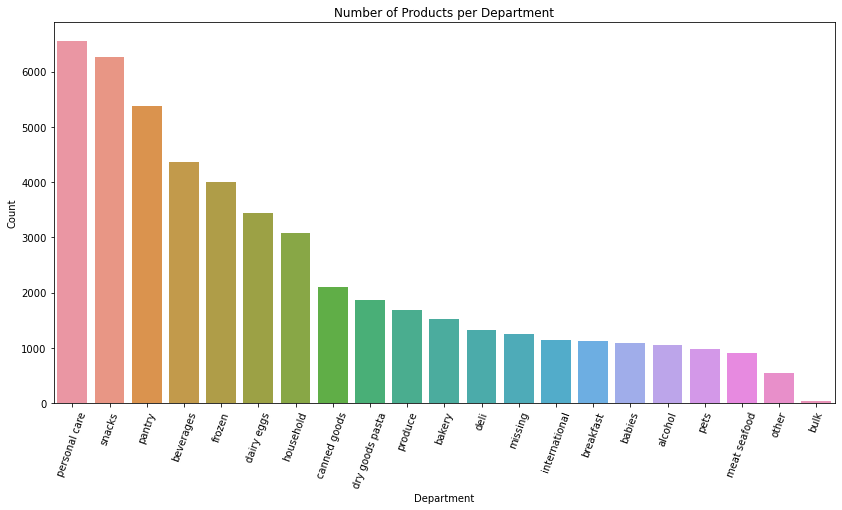

In [25]:
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= products_desc, order = products_desc.department.value_counts().index)
plt.title('Number of Products per Department')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Department')
# plt.savefig('Images/products_by_department.png')

In [5]:
len(products)

49688

In [16]:
products[products.department_id == 21]

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [8]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
aisles[aisles['aisle']=='missing']

,aisle_id,aisle
99,100,missing


In [13]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [5]:
products_desc = pickle.load(open("Pickle/products_desc.p", "rb"))


In [6]:
products_desc 

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [7]:
products_desc['metadata'] = products_desc.apply(lambda x : x['aisle']+' '+x['department']+' '+x['product_name'], axis = 1)


In [8]:
products_desc

,product_id,product_name,aisle_id,department_id,aisle,department,metadata
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...
...,...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol,"spirits alcohol Vodka, Triple Distilled, Twist..."
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen,frozen vegan vegetarian frozen En Croute Roast...
49685,49686,Artisan Baguette,112,3,bread,bakery,bread bakery Artisan Baguette
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets,cat food care pets Smartblend Healthy Metaboli...


In [9]:
count_vec = CountVectorizer(stop_words='english')


In [10]:
count_vec_matrix = count_vec.fit_transform(products_desc['metadata'])


In [11]:
count_vec_matrix.shape


(49688, 10624)

In [13]:
def vectorize_products_based_on_metadata(product_input):
    print(product_input)
    print(pd.Series(product_input))
    vec = count_vec.transform(pd.Series(product_input))
    print(vec)
    simil = cosine_similarity(vec, count_vec_matrix)
    print(simil)
    simil_scores = pd.DataFrame(simil.reshape(49688,), index = products_desc.index, columns=['score'])
    print(simil_scores)
    # Don't return scores of zero, only as many positive scores as exist
    non_zero_scores = simil_scores[simil_scores['score'] > 0]
    print("Non zero", non_zero_scores)
    if len(non_zero_scores) == 0:
        print('No similar products found.  Please refine your search terms and try again')
        return
    
    if len(non_zero_scores) < 10:
        item_count = len(non_zero_scores)
    else:
        item_count = 10
    
    similarity_scores = simil_scores.sort_values(['score'], ascending=False)[:item_count]
    
    return (products_desc['product_name'].iloc[similarity_scores.index])

In [14]:
vectorize_products_based_on_metadata('Oreos')


Oreos
0    Oreos
dtype: object
  (0, 6669)	1
[[0. 0. 0. ... 0. 0. 0.]]
       score
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
49683    0.0
49684    0.0
49685    0.0
49686    0.0
49687    0.0

[49688 rows x 1 columns]
Non zero           score
22014  0.408248
23995  0.333333


22014               Thin Mint Crisp Oreos
23995    Halloween Oreos Sandwich Cookies
Name: product_name, dtype: object

In [15]:
vectorize_products_based_on_metadata('Bubble Bath')

Bubble Bath
0    Bubble Bath
dtype: object
  (0, 971)	1
  (0, 1511)	1
[[0. 0. 0. ... 0. 0. 0.]]
       score
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
49683    0.0
49684    0.0
49685    0.0
49686    0.0
49687    0.0

[49688 rows x 1 columns]
Non zero           score
150    0.223607
228    0.223607
554    0.223607
914    0.223607
955    0.204124
...         ...
49181  0.235702
49213  0.204124
49289  0.213201
49370  0.288675
49405  0.204124

[278 rows x 1 columns]


42098                 Eucalyptus Ease Bubble Bath
42324                 Eucalyptus Mint Bubble Bath
10036           Over Tired and Cranky Bubble Bath
11065                    Bubble Bath Extra Gentle
42859    Super Sensitive No Fragrance Bubble Bath
18225                            Baby Bubble Bath
3490           Everyday Shea Lavender Bubble Bath
16699                      Baby Bee Bubble Bath -
7544                     Baby Bedtime Bubble Bath
35662                         Calming Bubble Bath
Name: product_name, dtype: object

In [16]:
vectorize_products_based_on_metadata('Bubble Bath')


Bubble Bath
0    Bubble Bath
dtype: object
  (0, 971)	1
  (0, 1511)	1
[[0. 0. 0. ... 0. 0. 0.]]
       score
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
49683    0.0
49684    0.0
49685    0.0
49686    0.0
49687    0.0

[49688 rows x 1 columns]
Non zero           score
150    0.223607
228    0.223607
554    0.223607
914    0.223607
955    0.204124
...         ...
49181  0.235702
49213  0.204124
49289  0.213201
49370  0.288675
49405  0.204124

[278 rows x 1 columns]


42098                 Eucalyptus Ease Bubble Bath
42324                 Eucalyptus Mint Bubble Bath
10036           Over Tired and Cranky Bubble Bath
11065                    Bubble Bath Extra Gentle
42859    Super Sensitive No Fragrance Bubble Bath
18225                            Baby Bubble Bath
3490           Everyday Shea Lavender Bubble Bath
16699                      Baby Bee Bubble Bath -
7544                     Baby Bedtime Bubble Bath
35662                         Calming Bubble Bath
Name: product_name, dtype: object

In [17]:
import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

In [18]:
stem_list=[]
for i in range(len(products_desc['metadata'])):
    word_list = nltk.word_tokenize(products_desc['metadata'][i])
    stem_set = list(set([stemmer.stem(word) for word in word_list]))
    stem_list.append(' '.join(stem_set))


In [19]:
stem_list

['cooki cake sandwich snack chocol',
 'spice salt pantri all-season season',
 'golden unsweeten oolong tea robust beverag',
 'with vodka rigatoni classic smart sauc frozen meal mini favorit cream one',
 'marinad prepar pantri green meat chile sauc anytim',
 'nose allergi flu person oil care cold dri',
 'with water pure beverag orang coconut juic nectar',
 "cut russet produc ' steam n frozen potato mash",
 'dairi egg strawberri blueberri yogurt light',
 'seltzer pear prick water & beverag orang sparkl juic',
 'mango refriger peach beverag juic',
 'dessert layer frozen cake fudg chocol',
 'allergi mist flu person nasal care cold salin',
 'scent dish household dishwash cleaner deterg fresh',
 'diaper 6 wipe size overnight babi',
 'syrup top flavor cream mint ice snack chocol',
 'counter fat meat duck seafood render poultri',
 'for frozen suprema one pizza',
 'quinoa blend gluten chees good & mushroom grain three rice pasta dri free',
 'alo vera enrich pomegran & beverag drink cranberri ju

In [20]:
from collections import defaultdict
word_count=defaultdict(int)
for idx, product in enumerate(stem_list):
    for word in product.split():
        word_count[word] +=1

In [21]:
word_count

defaultdict(int,
            {'cooki': 1207,
             'cake': 1155,
             'sandwich': 322,
             'snack': 6520,
             'chocol': 2996,
             'spice': 963,
             'salt': 917,
             'pantri': 5374,
             'all-season': 1,
             'season': 1090,
             'golden': 156,
             'unsweeten': 193,
             'oolong': 8,
             'tea': 1143,
             'robust': 9,
             'beverag': 4434,
             'with': 2209,
             'vodka': 66,
             'rigatoni': 22,
             'classic': 553,
             'smart': 88,
             'sauc': 1343,
             'frozen': 4045,
             'meal': 1978,
             'mini': 459,
             'favorit': 77,
             'cream': 2122,
             'one': 118,
             'marinad': 456,
             'prepar': 890,
             'green': 816,
             'meat': 2505,
             'chile': 103,
             'anytim': 3,
             'nose': 6,
             'alle

In [22]:
word_ones=[]
for word, count in word_count.items():
    if count == 1:
        word_ones.append(word)

In [23]:
word_ones

['all-season',
 'a-c-and',
 'tri-vi-sol®',
 'sa',
 'polypropylen',
 'blake',
 'smorz',
 'sprinklez',
 'x13\\',
 'oblong',
 'divino',
 'deet-fre',
 'marscapon',
 'olli',
 '118',
 'zita',
 'hacho',
 'nino',
 'fruitwater®',
 'oelek',
 '18+',
 'totz',
 'tegaderm',
 'tristat',
 'econet',
 'alpha-bit',
 'onezip',
 'chkn',
 '14oz.sweet',
 'cap-pen',
 'bros',
 'superjuic',
 '10,000mcg',
 'peppermint/banana',
 'veggie-styl',
 'dali',
 'eco-pac',
 '200ct',
 'hydracharg',
 'aquaphor',
 'lemon-ad',
 'soil',
 'bink',
 'yesterday',
 'acaí',
 'can/bottl',
 'w/spout',
 'brasilia',
 '7up',
 'verita',
 'mosel',
 '2014',
 'injera',
 'nasaflo',
 'oj',
 'melani',
 "pop'n",
 '7500',
 '12.8',
 'keebler',
 'towellett',
 'sugo',
 'listerine®',
 'mine',
 'countertop',
 '9.5nb',
 'lightest',
 '013021',
 'mag',
 'lost',
 'caffien',
 '490',
 'mania',
 '45,000',
 'chamomilla',
 'majest',
 'mini-wheel',
 'discoveri',
 'film',
 'maxtra',
 'cranberrri',
 'poly-vi-sol®',
 'potat',
 'scotti',
 'aspic',
 'haddock',
 'lb0

In [24]:
new_stem_list=[]
for i in range(len(products_desc['metadata'])):
    word_list = nltk.word_tokenize(products_desc['metadata'][i])
    stem_set = list(set([stemmer.stem(word) for word in word_list if stemmer.stem(word) not in word_ones]))
    new_stem_list.append(' '.join(stem_set)) 

In [25]:
products_desc['stemmed'] = stem_list
products_desc['new_stemmed'] = new_stem_list

In [26]:
products_desc.head()


,product_id,product_name,aisle_id,department_id,aisle,department,metadata,stemmed,new_stemmed
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies,cooki cake sandwich snack chocol,cooki cake sandwich snack chocol
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt,spice salt pantri all-season season,spice season pantri salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...,golden unsweeten oolong tea robust beverag,golden unsweeten oolong tea robust beverag
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...,with vodka rigatoni classic smart sauc frozen ...,with vodka rigatoni classic smart sauc frozen ...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...,marinad prepar pantri green meat chile sauc an...,marinad prepar pantri green meat chile sauc an...


In [27]:

products_desc.to_pickle("Pickle/products_desc_stemmed.p")


In [31]:
products_desc = pickle.load(open("Pickle/products_desc.p", "rb"))
products_desc

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [32]:
products_desc_stemmed = pickle.load(open("Pickle/products_desc_stemmed.p", "rb"))


In [33]:
products_desc_stemmed

,product_id,product_name,aisle_id,department_id,aisle,department,metadata,stemmed,new_stemmed
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies,cooki cake sandwich snack chocol,cooki cake sandwich snack chocol
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt,spice salt pantri all-season season,spice season pantri salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...,golden unsweeten oolong tea robust beverag,golden unsweeten oolong tea robust beverag
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...,with vodka rigatoni classic smart sauc frozen ...,with vodka rigatoni classic smart sauc frozen ...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...,marinad prepar pantri green meat chile sauc an...,marinad prepar pantri green meat chile sauc an...
...,...,...,...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol,"spirits alcohol Vodka, Triple Distilled, Twist...","vodka of tripl distil spirit vanilla , alcohol...","vodka of tripl distil spirit vanilla , alcohol..."
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen,frozen vegan vegetarian frozen En Croute Roast...,roast vegan vegetarian hazelnut frozen cranber...,roast vegan vegetarian hazelnut frozen cranber...
49685,49686,Artisan Baguette,112,3,bread,bakery,bread bakery Artisan Baguette,artisan bread bakeri baguett,artisan bread bakeri baguett
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets,cat food care pets Smartblend Healthy Metaboli...,healthi dri metabol smartblend care food pet cat,healthi dri metabol smartblend care food pet cat


In [34]:
products_desc_stemmed.columns.values

array(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'metadata', 'stemmed', 'new_stemmed'], dtype=object)

In [35]:
products_desc_stemmed.index.values

array([    0,     1,     2, ..., 49685, 49686, 49687], dtype=int64)

In [36]:
products_desc_stemmed.product_name.values

array(['Chocolate Sandwich Cookies', 'All-Seasons Salt',
       'Robust Golden Unsweetened Oolong Tea', ..., 'Artisan Baguette',
       'Smartblend Healthy Metabolism Dry Cat Food',
       'Fresh Foaming Cleanser'], dtype=object)

In [37]:
products_desc_stemmed.aisle.values

array(['cookies cakes', 'spices seasonings', 'tea', ..., 'bread',
       'cat food care', 'facial care'], dtype=object)

In [38]:
products_desc_stemmed.product_id.values

array([    1,     2,     3, ..., 49686, 49687, 49688], dtype=int64)

In [39]:
pickle.dump(products_desc_stemmed.columns.values,open('Pickle/columns.p','wb'))
pickle.dump(products_desc_stemmed.index.values, open('Pickle/prod_index.p', 'wb'))
pickle.dump(products_desc_stemmed.product_name.values, open('Pickle/prod_name.p', 'wb'))
pickle.dump(products_desc_stemmed.aisle.values, open('Pickle/prod_aisle.p', 'wb'))
pickle.dump(products_desc_stemmed.product_id.values, open('Pickle/prod_id.p', 'wb'))

In [40]:
stem_count_vec = pickle.load(open("Pickle/stem_count_vec.p", "rb"))



c:\Users\madan\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.24.1 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [41]:
products_desc_stemmed

,product_id,product_name,aisle_id,department_id,aisle,department,metadata,stemmed,new_stemmed
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies,cooki cake sandwich snack chocol,cooki cake sandwich snack chocol
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt,spice salt pantri all-season season,spice season pantri salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...,golden unsweeten oolong tea robust beverag,golden unsweeten oolong tea robust beverag
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...,with vodka rigatoni classic smart sauc frozen ...,with vodka rigatoni classic smart sauc frozen ...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...,marinad prepar pantri green meat chile sauc an...,marinad prepar pantri green meat chile sauc an...
...,...,...,...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol,"spirits alcohol Vodka, Triple Distilled, Twist...","vodka of tripl distil spirit vanilla , alcohol...","vodka of tripl distil spirit vanilla , alcohol..."
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen,frozen vegan vegetarian frozen En Croute Roast...,roast vegan vegetarian hazelnut frozen cranber...,roast vegan vegetarian hazelnut frozen cranber...
49685,49686,Artisan Baguette,112,3,bread,bakery,bread bakery Artisan Baguette,artisan bread bakeri baguett,artisan bread bakeri baguett
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets,cat food care pets Smartblend Healthy Metaboli...,healthi dri metabol smartblend care food pet cat,healthi dri metabol smartblend care food pet cat


In [44]:
np.array(products_desc_stemmed['stemmed'])[0]


'cooki cake sandwich snack chocol'

In [45]:
stem_count_vec = CountVectorizer(stop_words='english')
stem_count_vec_matrix = stem_count_vec.fit_transform(products_desc_stemmed['stemmed'])

In [46]:
stem_count_vec_matrix.shape

(49688, 9086)

In [60]:
new_stem_count_vec = CountVectorizer(stop_words='english')
new_stem_count_vec_matrix = new_stem_count_vec.fit_transform(products_desc_stemmed['new_stemmed'])

In [48]:
new_stem_count_vec_matrix.shape


(49688, 5310)

In [49]:
pickle.dump(stem_count_vec, open("Pickle/stem_count_vec.p", "wb"))
pickle.dump(stem_count_vec_matrix, open("Pickle/stem_count_vec_matrix.p", "wb"))
pickle.dump(new_stem_count_vec, open("Pickle/new_stem_count_vec.p", "wb"))
pickle.dump(new_stem_count_vec_matrix, open("Pickle/new_stem_count_vec_matrix.p", "wb"))

In [50]:
stem_count_vec = pickle.load(open("Pickle/stem_count_vec.p", "rb"))

In [61]:
f = open('p_list.txt', 'r')
lst = []
for line in f:
    lst.append(line[:-1])
f.close()
def stem_and_vectorize_products_based_on_metadata(product_input):

    word_list = nltk.word_tokenize(product_input)

    input_stemmed = ' '.join([stemmer.stem(word) for word in word_list])

    vec = stem_count_vec.transform(np.array(input_stemmed).reshape(1,))
    
    simil = cosine_similarity(vec, stem_count_vec_matrix)
    
    simil_scores = pd.DataFrame(simil.reshape(stem_count_vec_matrix.shape[0],), index = products_desc.index, columns=['score'])
    non_zero_scores = simil_scores[simil_scores['score'] > 0]
    
    if len(non_zero_scores) == 0:
        print('No similar products found.  Please refine your search terms and try again')
        return
    
    if len(non_zero_scores) < 10:
        item_count = len(non_zero_scores)
    else:
        item_count = 10
    
    similarity_scores = simil_scores.sort_values(['score'], ascending=False)[:item_count]
    data = products_desc['product_name'].iloc[similarity_scores.index]
    print(type(data.tolist()))
    data = data.tolist()
    for item in data:
        if item == product_input:
            data.remove(item)
    if (len(data) > 10) :
        data = data[:10]
    for item in lst:
        if len(data) > 10:
            break
        else :
            data.append(item)
    return data

In [62]:
recs = stem_and_vectorize_products_based_on_metadata('Bag of Organic Bananas') 


<class 'list'>


In [63]:
recs

['Organic Kiwi Bag',
 'Organic Lime Bag',
 'Organic Gala Apple Bag',
 'Organic Oolong Tea Bags',
 'Organic Matcha Tea Bags',
 'Organic Darjeeling Tea Bags',
 'Organic Green Tea Bags',
 'Organic Baby Carrot Bag',
 'Organic Bosc Pear Bag',
 'Large Lemon',
 'Organic Raspberries']

In [43]:
f = open('p_list.txt', 'r')
ls = []
for line in f:
    ls.append(line[:-1])
f.close()

In [44]:
ls

['Large Lemon',
 'Organic Raspberries',
 'Organic Strawberries',
 'Organic Avocado',
 'Organic Blueberries',
 'Organic Hass Avocado',
 'Organic Fuji Apple',
 'Banana',
 'Bag of Organic Bananas',
 'Honeycrisp Apple',
 'Organic Baby Spinach',
 'Cucumber Kirby',
 'Organic Whole Milk',
 'Seedless Red Grapes',
 'Strawberries',
 'Organic Yellow Onion',
 'Limes']

In [67]:
res = []
for item in ls:
    rs = []
    rs = stem_and_vectorize_products_based_on_metadata(item).tolist()
    for i in rs:
        res.append(i)
res


['Large Lemon',
 'Bag of Large Lemons',
 'Lemon Tea',
 'Lemon Bag',
 'Large Eggs',
 'Large Soup',
 'Sweet Lemon',
 'Large AA Eggs',
 'Lemon Tulsi Tea',
 'Large Enriched Bread',
 'Organic Raspberry Tea',
 'Organic Raspberry Black Tea',
 'Organic Red Raspberries',
 'Organic Raspberry Fruit Spread',
 'Organic Raspberry Yogurt',
 'Frozen Organic Red Raspberries',
 'Organic Premium Raspberry Spread',
 'Organic Preserve Raspberry',
 'Organic Raspberry Ice Cream',
 'Organic Raspberry Ginger',
 'Organic Whole Strawberries',
 'Organic Strawberry Spread',
 'Organic Strawberry Thirst Quencher',
 'Organic Strawberry Yogurt',
 'Organic Strawberries',
 'Premium Organic Spread Strawberry',
 'Fruit Spread, Organic, Strawberry',
 'Organic Strawberry Preserves',
 'Premium Organic Strawberry Spread',
 'Organic Strawberry Fruit Spread',
 'Organic Avocado Oil',
 'Organic Avocado',
 'Organic Avocados',
 'Organic Avocados 5 Count',
 'Organic Hass Avocado',
 'Organic Wild Rumpus Avocado Babyfood',
 'Organic H

In [61]:
print(type(stem_and_vectorize_products_based_on_metadata("Banana").tolist()))

<class 'list'>


In [56]:
stem_and_vectorize_products_based_on_metadata("Banana")

<class 'list'>


['Baby Banana',
 'Banana Nut Cereal',
 'Banana  Granola Cereal',
 'Granola Banana Nut',
 'Banana Pudding',
 'Strawberry Banana',
 'Bananas',
 'Peanut Butter Banana',
 'Banana Nonfat Yogurt',
 'Large Lemon',
 'Organic Raspberries']

In [55]:
ls = ['Seedless Red Grapes', 'Strawberries', 'Organic Strawberries', 'Organic Baby Spinach', 'Limes', 'Organic Whole Milk', 'Organic Fuji Apple', 'Honeycrisp Apple', 'Large Lemon', 'Organic Avocado', 'Cucumber Kirby']
for l in ls:
    print(stem_and_vectorize_products_based_on_metadata(l))

<class 'list'>
['Red Seedless Grapes', 'Red Seedless Grapes Bunch', 'Red Seedless Grapes Imported', 'Organic Red Seedless Grapes', 'Concord Grape', 'Red Grapes', 'Grape Wine, Delicious Red', 'Green Seedless Grapes', 'Red Grape Juice Cocktail', 'Large Lemon', 'Organic Raspberries']
<class 'list'>
['YoKids Strawberry Banana/Strawberry Yogurt', 'Whole Strawberries', 'Strawberry Guava', 'Whole Frozen Strawberries', 'Frozen Strawberries', 'Strawberry Spread', 'Strawberry Shampoo', 'Frozen Whole Strawberries', 'Slim Strawberry', 'Strawberries Whole', 'Large Lemon']
<class 'list'>
['Organic Whole Strawberries', 'Organic Strawberry Spread', 'Organic Strawberry Thirst Quencher', 'Organic Strawberry Yogurt', 'Premium Organic Spread Strawberry', 'Fruit Spread, Organic, Strawberry', 'Organic Strawberry Preserves', 'Premium Organic Strawberry Spread', 'Organic Strawberry Fruit Spread', 'Large Lemon', 'Organic Raspberries']
<class 'list'>
['Organic Spinach & Potatoes 2, 6 Months+', 'Pears, Kale & Sp

In [69]:
f = open('res.txt', 'w')
for item in res:
    f.writelines(item)
    f.write('\n')
f.close()

In [71]:
rt = set(res)
len(rt)

161